In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

# Figures and Subplots

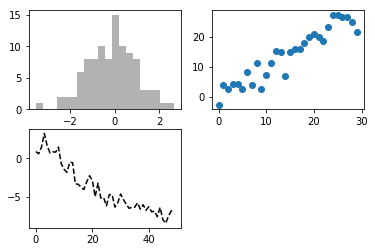

In [3]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
from numpy.random import randn
plt.plot(randn(50).cumsum(), 'k--')  #k--是一个线型选项，用于告诉matplotlib绘制黑色虚线图。
_ = ax1.hist(randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * randn(30))

In [4]:
plt.close('all')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000225B4435588>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000225B4BC9BE0>]], dtype=object)

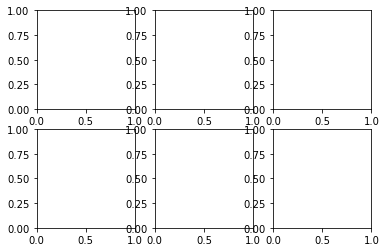

In [5]:
fig,axes = plt.subplots(2,3)
axes

## 调整subplot周围的间距

In [6]:
plt.subplots_adjust(left = None,bottom = None, right = None, top = None,wspace = None, hspace = None)

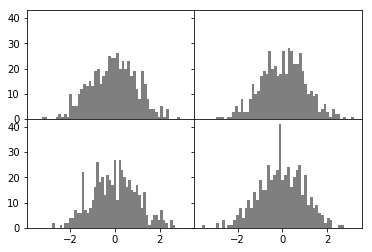

In [7]:
fig,axes = plt.subplots(2,2,sharex = True,sharey = True)
for i in range(2):
    for j in range(2):
        axes[i,j].hist(randn(500),bins = 50,color = 'k',alpha = 0.5)
plt.subplots_adjust(wspace = 0,hspace =0)

## 颜色、标记和线型

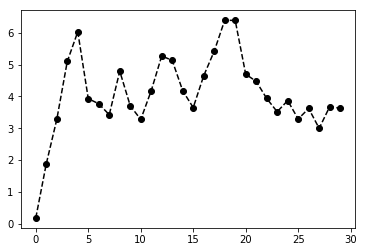

In [8]:
plt.plot(randn(30).cumsum(),'ko--')

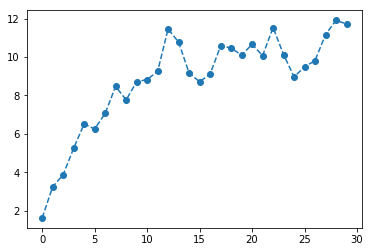

In [9]:
plt.plot(randn(30).cumsum(),linestyle ='dashed',marker = 'o')

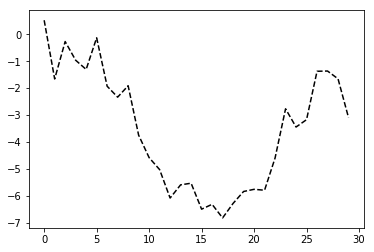

In [10]:
data = randn(30).cumsum()
plt.plot(data,'k--',label = 'Default')

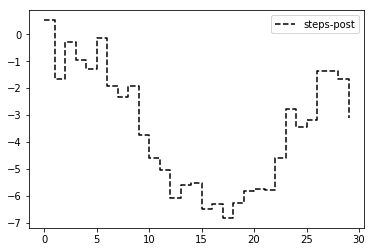

In [11]:
plt.plot(data,'k--',drawstyle = 'steps-post',label = 'steps-post')
plt.legend(loc = 'best')

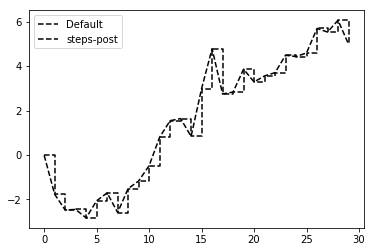

In [12]:
data = randn(30).cumsum()
plt.plot(data,'k--',label = 'Default')
plt.plot(data,'k--',drawstyle = 'steps-post',label = 'steps-post')
plt.legend(loc = 'best')

## 设置标题、轴标签、刻度及刻度标签

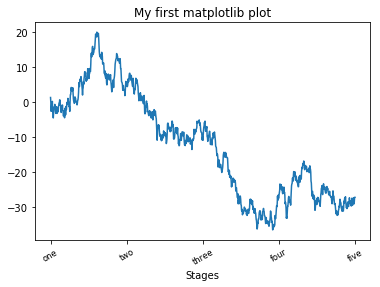

In [13]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(randn(1000).cumsum())
ticks = ax.set_xticks([0,250,500,750,1000])
labels = ax.set_xticklabels(['one','two','three','four','five'],rotation = 30,fontsize = 'small')
ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')

## 添加图例

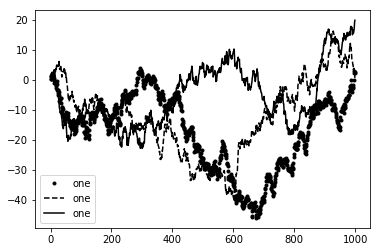

In [14]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(randn(1000).cumsum(),'k.',label = 'one')
ax.plot(randn(1000).cumsum(),'k--',label = 'one')
ax.plot(randn(1000).cumsum(),'k',label = 'one')
plt.legend(loc = 'best')

# 注解以及在Subplot上绘图

In [15]:
from datetime import datetime

In [16]:
data = pd.read_csv('spx.csv',index_col = 0,parse_dates = True)
data.head()

,SPX
1990-02-01,328.79
1990-02-02,330.92
1990-02-05,331.85
1990-02-06,329.66
1990-02-07,333.75


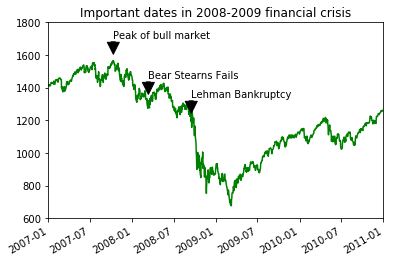

In [17]:
from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

spx = data['SPX']

spx.plot(ax=ax, style='g-')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 50),
                xytext=(date, spx.asof(date) + 200),
                arrowprops=dict(facecolor='black'),
                horizontalalignment='left', verticalalignment='top')

# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in 2008-2009 financial crisis')

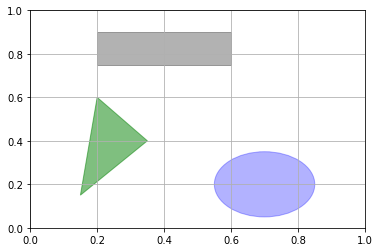

In [18]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)   #矩形
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)    #圆形
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],    #三角形
                   color='g', alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)  #patch 块
plt.grid()

# 图片保存（导出）

In [19]:
fig.savefig('figpath.png',dpi = 400,bbox_inches = 'tight')

In [20]:
from io import BytesIO
buffer = BytesIO()
plt.savefig(buffer)
plot_data = buffer.getvalue()

# pandas中的绘图函数

In [21]:
plt.close('all')

## 线型图

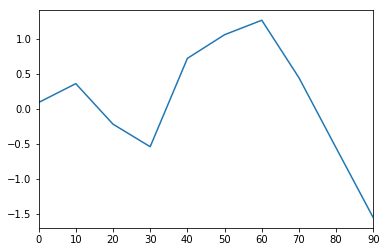

In [26]:
s = Series(np.random.randn(10).cumsum(),index = np.arange(0,100,10))
s.plot()

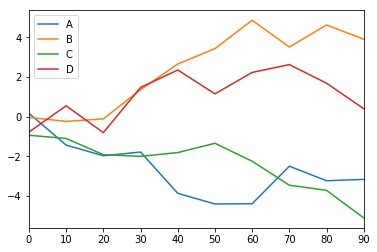

In [27]:
df  = DataFrame(np.random.randn(10,4).cumsum(0),
               columns = ['A','B','C','D'],
               index = np.arange(0,100,10))
df.plot()

In [28]:
df

,A,B,C,D
0,0.173965,-0.026450,-0.931871,-0.769773
10,-1.422856,-0.231586,-1.090754,0.557294
20,-1.963225,-0.102851,-1.909562,-0.798089
30,-1.775164,1.368069,-1.992447,1.478759
40,-3.857642,2.662052,-1.802494,2.360846
50,-4.395649,3.438686,-1.334757,1.157407
60,-4.381240,4.868546,-2.239819,2.237500
70,-2.489303,3.518302,-3.446681,2.632400
80,-3.223509,4.630495,-3.708231,1.694364
90,-3.154585,3.912343,-5.097114,0.408468


## Bar plots柱状图

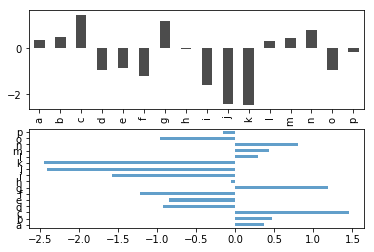

In [31]:
fig,axes = plt.subplots(2,1)
data = Series(np.random.randn(16),index = list('abcdefghijklmnop'))
data.plot(kind = 'bar',ax = axes[0],color = 'k',alpha = 0.7)
data.plot(kind = 'barh', ax = axes[1],alpha = 0.7)             #alpha 图标的填充不透明度

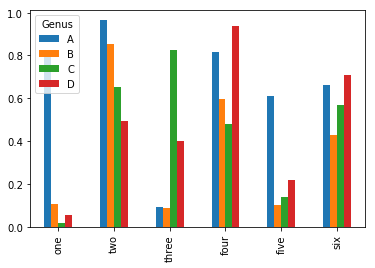

In [33]:
df = DataFrame(np.random.rand(6,4),
              index = ['one','two','three','four','five','six'],
              columns = pd.Index(['A','B','C','D'],name = 'Genus'))
df.plot(kind = 'bar')

In [34]:
df

Genus,A,B,C,D
one,0.826716,0.105946,0.018493,0.055736
two,0.964828,0.854239,0.654986,0.493544
three,0.095903,0.090713,0.826995,0.400248
four,0.814609,0.597624,0.482522,0.936683
five,0.609537,0.102385,0.138793,0.221070
six,0.660555,0.431444,0.568188,0.710918


In [35]:
plt.figure()

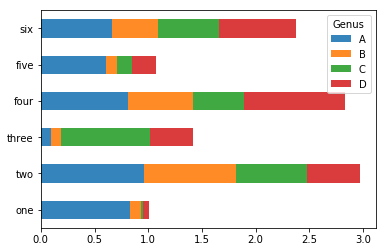

In [39]:
df.plot(kind = 'barh',stacked = True,alpha = 0.9)

In [81]:
tips = pd.read_csv('tips.csv')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [82]:
party_counts = pd.crosstab(tips['day'],tips['size'],margins = True)
party_counts

size,1,2,3,4,5,6,All
day,,,,,,,
Fri,1,16,1,1,0,0,19
Sat,2,53,18,13,1,0,87
Sun,0,39,15,18,3,1,76
Thur,1,48,4,5,1,3,62
All,4,156,38,37,5,4,244


In [84]:
party_counts = party_counts.iloc[:,2:5]

In [85]:
party_pcts = party_counts.div(party_counts.sum(1).astype(float),axis = 0)
party_pcts

size,3,4,5
day,,,
Fri,0.500000,0.50000,0.000000
Sat,0.562500,0.40625,0.031250
Sun,0.416667,0.50000,0.083333
Thur,0.400000,0.50000,0.100000
All,0.475000,0.46250,0.062500


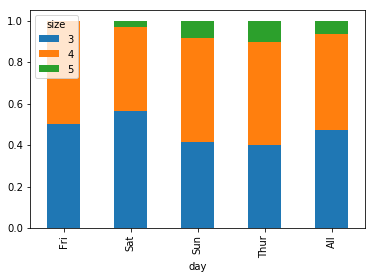

In [86]:
party_pcts.plot(kind = 'bar',stacked = True)

## 直方图和密度图

In [72]:
plt.figure()

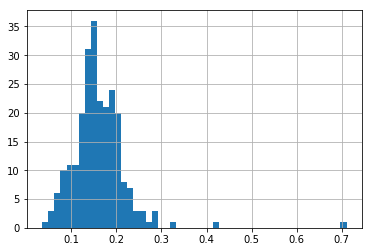

In [87]:
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips['tip_pct'].hist(bins = 50)

In [88]:
plt.figure()

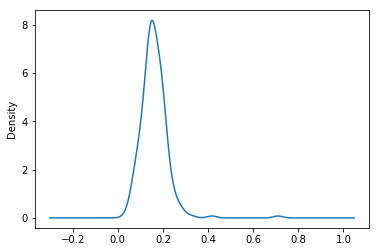

In [89]:
tips['tip_pct'].plot(kind = 'kde')

In [90]:
plt.figure()

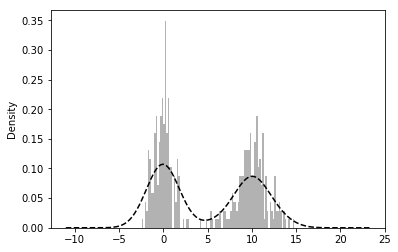

In [92]:
comp1 = np.random.normal(0,1,size = 200)
comp2 = np.random.normal(10,2,size = 200)
values = Series(np.concatenate([comp1,comp2]))
values.hist(bins =100,alpha = 0.3,color = 'k',normed = True)
values.plot(kind = 'kde',style = 'k--')

## 散点图

In [94]:
macro = pd.read_csv('macrodata.csv')
data = macro[['cpi','m1','tbilrate','unemp']]
trans_data = np.log(data).diff().dropna()
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


In [98]:
plt.figure()

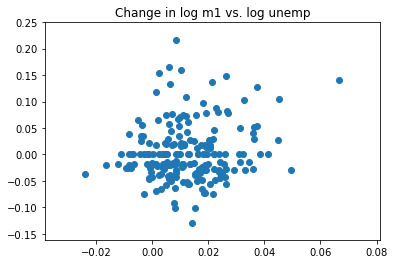

In [99]:
plt.scatter(trans_data['m1'],trans_data['unemp'])
plt.title('Change in log %s vs. log %s'% ('m1','unemp'))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000225BA7FB6D8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000225BAD97518>]], dtype=object)

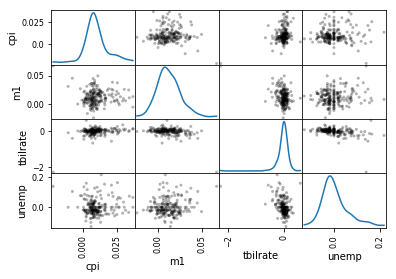

In [103]:
 pd.plotting.scatter_matrix(trans_data,diagonal = 'kde',color ='k',alpha = 0.3)

## 绘制地图

In [ ]:
data = pd.read_csv('Haiti.csv')

In [105]:
data[['INCIDENT DATE','LATITUDE','LONGITUDE']][:10]

,INCIDENT DATE,LATITUDE,LONGITUDE
0,05/07/2010 17:26,18.233333,-72.533333
1,28/06/2010 23:06,50.226029,5.729886
2,24/06/2010 16:21,22.278381,114.174287
3,20/06/2010 21:59,44.407062,8.933989
4,18/05/2010 16:26,18.571084,-72.334671
5,26/04/2010 13:14,18.593707,-72.310079
6,26/04/2010 14:19,18.482800,-73.638800
7,26/04/2010 14:27,18.415000,-73.195000
8,15/03/2010 10:58,18.517443,-72.236841
9,15/03/2010 11:00,18.547790,-72.410010


In [111]:
data['CATEGORY'][:10]

0           1. Urgences | Emergency, 3. Public Health, 
4                             1. Urgences | Emergency, 
5                        5e. Communication lines down, 
6     4. Menaces | Security Threats, 4e. Assainissem...
7                       4. Menaces | Security Threats, 
8     2. Urgences logistiques | Vital Lines, 2f. San...
9     2. Urgences logistiques | Vital Lines, 2d. Ref...
10    1a. Highly vulnerable, 2. Urgences logistiques...
11    4. Menaces | Security Threats, 4e. Assainissem...
12    2. Urgences logistiques | Vital Lines, 2d. Ref...
Name: CATEGORY, dtype: object

In [108]:
data.describe()

,Serial,LATITUDE,LONGITUDE
count,3593.000000,3593.000000,3593.000000
mean,2080.277484,18.611495,-72.322680
std,1171.100360,0.738572,3.650776
min,4.000000,18.041313,-74.452757
25%,1074.000000,18.524070,-72.417500
50%,2163.000000,18.539269,-72.335000
75%,3088.000000,18.561820,-72.293570
max,4052.000000,50.226029,114.174287


In [109]:
data = data[(data.LATITUDE > 18) & (data.LATITUDE < 20) &
(data.LONGITUDE > -75) & (data.LONGITUDE < -70) & 
data.CATEGORY.notnull()]

In [110]:
def to_cat_list(catstr):
    stripped = (x.strip() for x in catstr.split(','))
    return [x for x in stripped if x]

def get_all_categories(cat_series):
    cat_sets = (set(to_cat_list(x)) for x in cat_series)
    return sorted(set.union(*cat_sets))

def get_english(cat):
    code, names = cat.split('.')
    if '|' in names:
        names = names.split(' | ')[1]
    return code, names.strip()

In [112]:
get_english('2. Urgences logistiques | Vital Lines')

('2', 'Vital Lines')

In [115]:
all_cats = get_all_categories(data.CATEGORY)
# Generator expression
english_mapping = dict(get_english(x) for x in all_cats)
english_mapping['2a']

'Food Shortage'

In [116]:
english_mapping['6c']

'Earthquake and aftershocks'